In [420]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Surpress warnings 
import warnings
warnings.filterwarnings('ignore')

In [466]:
df=pd.read_csv(Path("Data/kc_house_data.csv"),index_col="id")
df.shape

(21613, 20)

#### Generating report for features

In [467]:
# import sweetviz as sv
# report=sv.analyze(df)
# report.show_html("./report.html")

In [468]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

#### Finding out which ML model works the best on raw data

In [425]:
#Defining various models

#1. Linear Regressor model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=1,criterion='mse',max_depth=10)

#3.Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=100,max_depth=10)

#4. KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

#5.Boosting
from sklearn.ensemble import GradientBoostingRegressor
grboost=GradientBoostingRegressor(random_state=1)

In [426]:
# Create a function that returns train and test accuracy of different models.
def accuracy(model):
    model.fit(X_train,y_train)
#   train_accuracy = model.score(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    test_accuracy = model.score(X_test, y_test)
    test_accuracy = np.round(test_accuracy*100, 2)
    return train_accuracy,test_accuracy

In [427]:
# Create DataFrame that illustrates the accuracy of tmodels
accuracy=pd.DataFrame([accuracy(lr), accuracy(dt), accuracy(rf), 
                                           accuracy(knn),accuracy(grboost)])
accuracy.index = ['LinearReg', 'DecisionTree','RandomForest','KNN','GradienBoost']
accuracy.columns=['Train_accuracy(%)','Test_accuracy(%)']
sorted_accuracy_df = accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
sorted_accuracy_df

,Train_accuracy(%),Test_accuracy(%)
RandomForest,93.39,85.16
DecisionTree,91.33,80.82
GradienBoost,90.04,85.98
LinearReg,70.55,68.68
KNN,61.35,48.98


<AxesSubplot:>

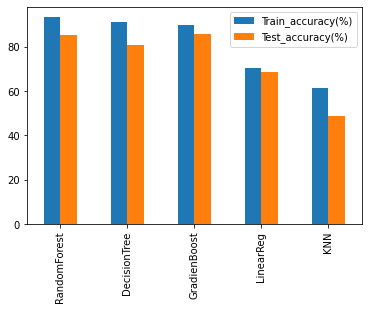

In [428]:
sorted_accuracy_df.plot(kind="bar")

### Exploratory Data Analysis

In [469]:
# Splitting the "date" column into 3 different values- month,quarter  
df["date"]=pd.to_datetime(df["date"])
df["month"]=pd.DatetimeIndex(df['date']).month
df["quarter"]=pd.DatetimeIndex(df['date']).quarter
df=df.drop("date",axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,4
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,4
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,1
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,4
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,1


In [470]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [471]:
df["floors"]=df["floors"].values.round()
df["floors"].unique()

array([1., 2., 3., 4.])

In [472]:
df["bathrooms"]=df["bathrooms"].values.round()

In [473]:
df["bathrooms"].values

array([1., 2., 1., ..., 1., 2., 1.])

In [474]:
print(df["bedrooms"].value_counts())
df=df.drop(df.loc[df["bedrooms"].values>=10,:].index,axis=0)

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


In [475]:
# Fitting linear regression

In [476]:
# Separate the y variable, the labels
y=df["price"]
# Separate the X variable, the features
X=df.drop(["price"],axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
id,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,4
6414100192,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,4
5631500400,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,1
2487200875,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,4
1954400510,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.0,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2
6600060120,4,2.0,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,1
1523300141,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  zipcode        21608 non-null  int64  
 15  lat            21608 non-null  float64
 16  long           21608 non-null  float64
 17  sqft_living15  21608 non-null  int64

In [478]:
# Encoding the categorical feature "zipcode"  

# map_dict = {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)}
#eer_style_dict = {value:key for key, value in convert_cats['beer_style'].items()}
map_dict = {n + 1: cat for n, cat in enumerate(df["zipcode"].astype('category').cat.categories)}
df["zipcode"] = pd.DataFrame(df["zipcode"].astype('category').cat.codes + 1, index=df.index)
df.head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,67,47.5112,-122.257,1340,5650,10,4
6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,...,400,1951,1991,56,47.7210,-122.319,1690,7639,12,4
5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,6,...,0,1933,0,17,47.7379,-122.233,2720,8062,2,1
2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,...,910,1965,0,59,47.5208,-122.393,1360,5000,12,4
1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,...,0,1987,0,38,47.6168,-122.045,1800,7503,2,1
7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,3,11,...,1530,2001,0,30,47.6561,-122.005,4760,101930,5,2
1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,3,7,...,0,1995,0,3,47.3097,-122.327,2238,6819,6,2
2008000270,291850.0,3,2.0,1060,9711,1.0,0,0,3,7,...,0,1963,0,69,47.4095,-122.315,1650,9711,1,1
2414600126,229500.0,3,1.0,1780,7470,1.0,0,0,3,7,...,730,1960,0,61,47.5123,-122.337,1780,8113,4,2


In [480]:
df["zipcode"].unique()

array([67, 56, 17, 59, 38, 30,  3, 69, 61, 24,  7, 50, 46, 57, 12, 43,  2,
       58, 26, 41, 19, 54, 49, 29, 16, 52, 33,  1, 32, 64, 14, 36, 62, 44,
       27,  8, 34, 55, 60,  4,  5, 23, 39, 51,  9, 53, 70, 21, 28, 42, 40,
       47, 65, 66, 35, 18,  6, 48, 13, 22, 63, 15, 10, 20, 45, 37, 68, 11,
       31, 25], dtype=int8)

### Data split

In [481]:
# Separate the y variable, the labels
df.reset_index(drop=True, inplace=True)
y=df["price"]
# Separate the X variable, the features
X=df.drop(["price"],axis=1)
X[:5]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,67,47.5112,-122.257,1340,5650,10,4
1,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,56,47.7210,-122.319,1690,7639,12,4
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,17,47.7379,-122.233,2720,8062,2,1
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,59,47.5208,-122.393,1360,5000,12,4
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,38,47.6168,-122.045,1800,7503,2,1


In [482]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [483]:
# Create a StandardScaler instance
scaler = StandardScaler()
scaler1 = StandardScaler()
# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)  #scaler.fit_transform(X_train)
y_scaler = scaler1.fit(y_train.values.reshape(-1,1))
# Fit the scaler to the features training dataset
X_train_scaled =X_scaler.transform(X_train)
X_test_scaled =X_scaler.transform(X_test)

y_train_scaled =y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled =y_scaler.transform(y_test.values.reshape(-1,1))

## Linear regression

In [484]:
# Import the LogisticRegression module from SKLearn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Fit the model using training data
model.fit(X_train_scaled,y_train_scaled)
# Make a prediction using the testing data
y_pred_test=model.predict(X_test_scaled)

# Check the accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
y_test = y_scaler.inverse_transform(y_test_scaled)
y_pred_test = y_scaler.inverse_transform(y_pred_test)

# print(np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

print(mean_absolute_error(y_test,y_pred_test))
print(mean_absolute_percentage_error(y_test,y_pred_test))

0.6983715324856543
125336.62931622271
0.25021876740299925


#### Defining different models

In [485]:
#reversing the scaler to  
pd.DataFrame(X_scaler.inverse_transform(model.coef_).flatten(), X.columns.values)
#if you dont scale X:
# pd.DataFrame(model.coef_.flatten(), X.columns.values) 

,0
bedrooms,3.285088
bathrooms,2.125979
sqft_living,2279.384784
sqft_lot,15769.384179
floors,1.544330
waterfront,0.020262
view,0.312440
condition,3.443889
grade,8.043798
sqft_above,1951.960977


   bedrooms  bathrooms  sqft_living  sqft_lot  condition     grade  \
0 -0.407665  -1.401473    -0.979732 -0.228338  -0.629098 -0.558855   
1 -0.407665  -0.077451     0.533994 -0.189907  -0.629098 -0.558855   
2 -1.514856  -1.401473    -1.426227 -0.123327  -0.629098 -1.409558   
3  0.699527   1.246571    -0.130303 -0.244030   2.444626 -0.558855   
4 -0.407665  -0.077451    -0.435226 -0.169677  -0.629098  0.291849   

   sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
0   -0.734591      -0.658561 -0.545131     -0.210034  1.602999 -0.352455   
1    0.460938       0.245595 -0.681326      4.748826  1.031450  1.161561   
2   -1.229709      -0.658561 -1.294205     -0.210034 -0.994953  1.283519   
3   -0.891580       1.398394 -0.204643     -0.210034  1.187327 -0.283177   
4   -0.130789      -0.658561  0.544431     -0.210034  0.096187  0.409605   

       long     month   quarter  
0 -0.306141  1.099778  1.426601  
1 -0.746383  1.741780  1.426601  
2 -0.135725 -1.46822

<AxesSubplot:title={'center':'Elbow Curve 1'}, xlabel='k'>

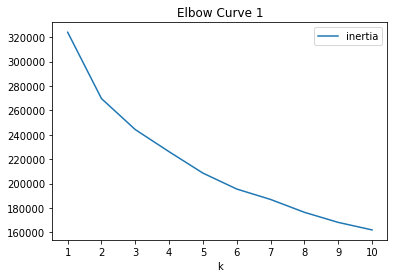

In [486]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use the `StandardScaler()` module from scikit-learn to normalize the data

df=df.drop(["price","sqft_living15","sqft_lot15","view","floors","waterfront"],axis=1)
scaled_data = StandardScaler().fit_transform(df)
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_data,
    columns=df.columns
)


# Display sample data
print(df_scaled.head())

# Create a list with the number of k-values to try
k=list(range(1,11))
# Create an empy list to store the inertia values
inertia =[]
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model_kmeans=KMeans(n_clusters=i,random_state=0)
    model_kmeans.fit(df_scaled)
    inertia.append(model_kmeans.inertia_)
inertia  
# Create a dictionary with the data to plot the Elbow curve
elbow_data={
    "k":k,
    "inertia":inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data=pd.DataFrame(elbow_data)
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_chart1 = df_elbow_data.plot.line(x="k",y="inertia",title="Elbow Curve 1", xticks=k)
elbow_chart1

In [487]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=10,random_state=0)
model.fit(df_scaled)

# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_predicted_data=model.predict(df_scaled)

# View the resulting array of cluster values.
scaled_predicted_data
# Create a copy of the DataFrame
df_predicted_data=df_scaled.copy()
df_predicted_data["prediction"]=scaled_predicted_data

<AxesSubplot:title={'center':'Clustering with K-means'}, xlabel='bedrooms', ylabel='month'>

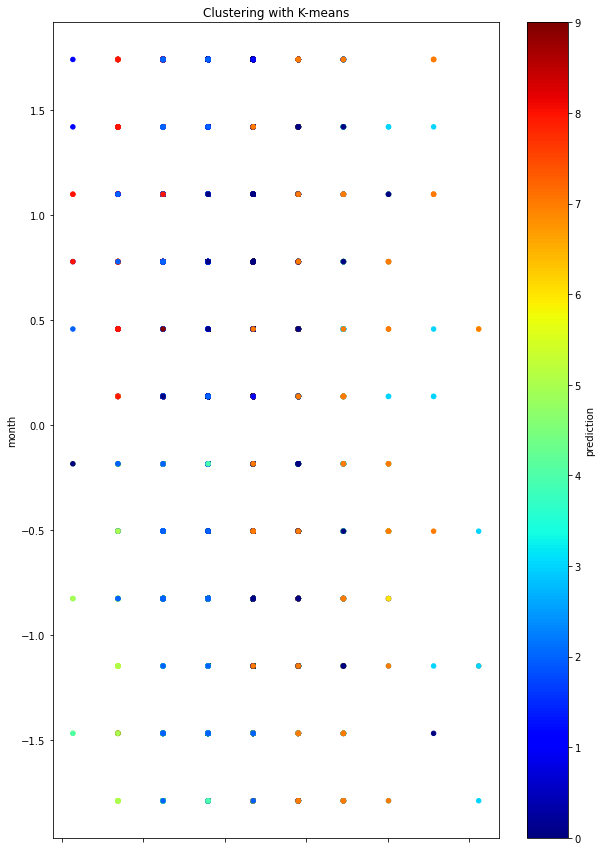

In [488]:
# Create a scatter plot using hvPlot by setting 
scatterplot=df_predicted_data.plot(kind="scatter",figsize=(10,15),title="Clustering with K-means",x="bedrooms", y="month",cmap="jet",c= "prediction")
scatterplot

In [127]:
# sorted(list(zip(rf.feature_importances_,df.iloc[:,:-1].columns)))